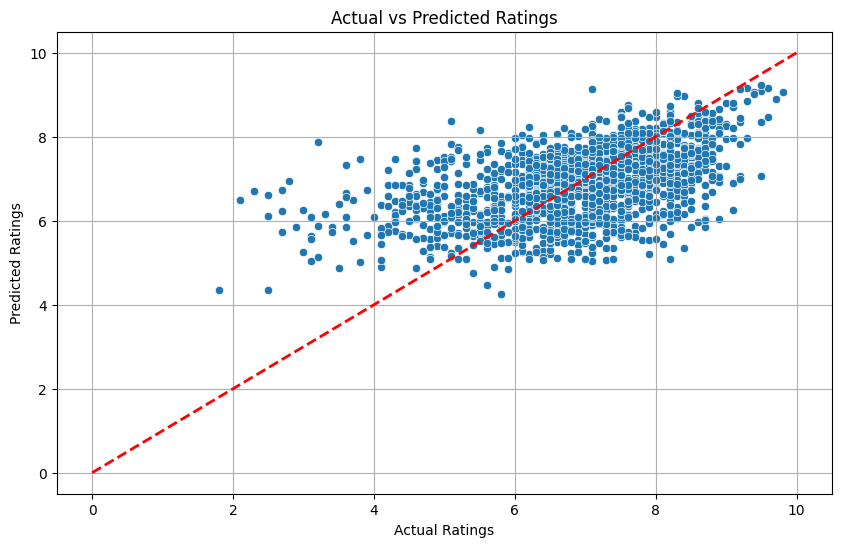

0.9762023999999999

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
csv_file_path = './movies.csv'
movies_df = pd.read_csv(csv_file_path)

# Data Preprocessing
# Convert 'YEAR' to numeric by extracting the year part
movies_df['YEAR'] = movies_df['YEAR'].str.extract('(\d{4})').astype(float)

# Convert 'VOTES' to numeric by removing commas
movies_df['VOTES'] = movies_df['VOTES'].str.replace(',', '').astype(float)

# Selecting features and target
features = movies_df[['YEAR', 'RunTime', 'VOTES']]
target = movies_df['RATING']

# Handling missing values: Impute missing values with the median
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)
target_imputed = target.fillna(target.median())

# Normalizing the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_imputed, test_size=0.2, random_state=42)

# Applying KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Visualize the results
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.plot([0, 10], [0, 10], color='red', lw=2, linestyle='--')  # Adding a reference line for perfect predictions
plt.grid(True)
plt.show()

# Output the Mean Squared Error
mse
